In [1]:
%run ./get_fixed_variables.ipynb # load plotting functions and fixed vars

In [2]:
TSMN_8xco2_strato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/TSMN_8xco2_strato.npy')
TSMN_8xco2_nostrato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/TSMN_8xco2_nostrato.npy')
TSMN_8xco2 = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/TSMN_8xco2_spinup.npy')
TSMN_1xco2_strato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/TSMN_PI_strato.npy')


TS_8xco2_strato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/TS_8xco2_strato.npy')
TS_8xco2_nostrato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/TS_8xco2_nostrato.npy')

In [3]:
NA_lat = np.where(np.logical_and(lat<=50, lat>=43))[0]
NA_lon = np.where(np.logical_and(lon<=268, lon>=256))[0]
WY_mask = np.ones([len(lat), len(lon)])*np.nan
WY_mask[NA_lat[0]:NA_lat[-1],NA_lon[0]:NA_lon[-1]] = 1

In [4]:
def minimum_temp_array(data, years):
    def winter_daily(data, years):
        jan = np.zeros([31, years, len(lat), len(lon)])
        feb = np.zeros([28, years, len(lat), len(lon)])
        dec = np.zeros([31, years, len(lat), len(lon)])
        start = len(data) - 365*years
        for i in range(years):
            jan[:,i] = data[start+i:start+i+(0+31),:,:]
            feb[:,i] = data[start+i+31:start+i+(31+28),:,:]
            dec[:,i] = data[start+i+(365-31):start+i+(365),:,:]
        winter_data = np.concatenate([dec,jan,feb])
        return(winter_data)
    
    
    x = winter_daily(data, years).reshape(90*years, 96, 144) # 90 days per DJF period
    x_flat = np.reshape(x[:,:,:]*WY_mask, (50*90, 96*144)) # flatten lat/lon and only choose WY 
    x_min = np.nanmin(x_flat, axis=1) # get coldest grid cell in WY each day
    x_final=x_min[~np.isnan(x_min)] # return only regions near WY
    return(x_final)



WY_TSMN_8xco2_strato_winter = minimum_temp_array(TSMN_8xco2_strato, 50)
WY_TSMN_8xco2_nostrato_winter = minimum_temp_array(TSMN_8xco2_nostrato, 50)
WY_TSMN_1xco2_strato_winter = minimum_temp_array(TSMN_1xco2_strato, 50)
WY_TSMN_8xco2_winter = minimum_temp_array(TSMN_8xco2, 50)


In [5]:
# calculate mean DJF warming in this region

DJF_warming = np.nanmean((DJF_avg(TS_8xco2_nostrato, 50)-DJF_avg(TS_8xco2_strato,50))*WY_mask)
DJF_warming

3.561563816070546

/glade/derecho/scratch/asalazar/tmp/ipykernel_1663/2355673459.py:42: RuntimeWarning: divide by zero encountered in divide
  ax[1].bar(WY_TSMN_1xco2_strato_x,(1/(WY_TSMN_1xco2_strato_cdf))  ,color="b")
/glade/derecho/scratch/asalazar/tmp/ipykernel_1663/2355673459.py:43: RuntimeWarning: divide by zero encountered in divide
  ax[1].step(WY_TSMN_8xco2_strato_x,1/WY_TSMN_8xco2_strato_cdf,color="r", linewidth=2,label = '8xCO$_2$, $\it{strato}$');
/glade/derecho/scratch/asalazar/tmp/ipykernel_1663/2355673459.py:44: RuntimeWarning: divide by zero encountered in divide
  ax[1].step(WY_TSMN_8xco2_nostrato_meanshifted_x,1/WY_TSMN_8xco2_nostrato_meanshifted_cdf,color="pink", linestyle='--',linewidth=2,label = '8xCO$_2$, $\it{strato}$, mean shifted');
/glade/derecho/scratch/asalazar/tmp/ipykernel_1663/2355673459.py:45: RuntimeWarning: divide by zero encountered in divide
  ax[1].step(WY_TSMN_8xco2_nostrato_x,1/WY_TSMN_8xco2_nostrato_cdf,color="pink", linewidth=2,label = '8xCO$_2$, $\it{no}$-$\it{st

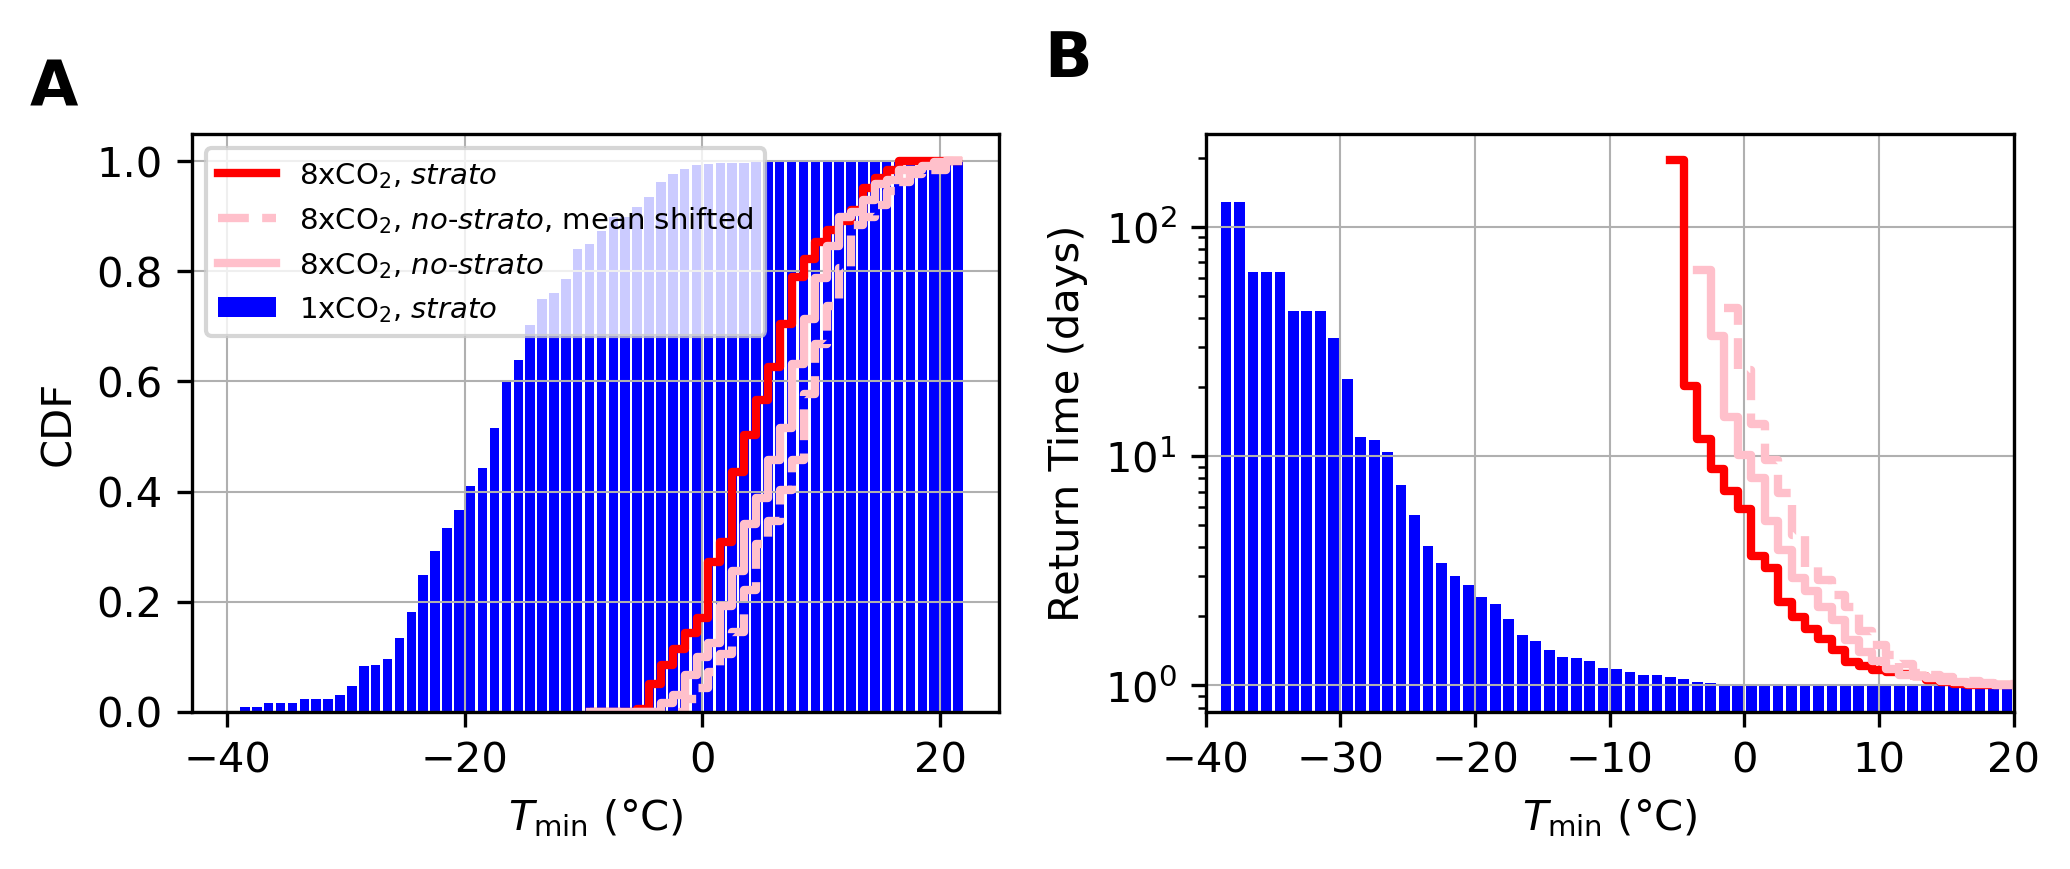

In [14]:
WY_TSMN_8xco2_strato_winter_hist, WY_TSMN_8xco2_strato_winter_bin_edges = np.histogram(WY_TSMN_8xco2_strato_winter-273, bins=range(-10,23,1), density=True)
# center of bins, used for x-axis when plotting and calculating CDF:
WY_TSMN_8xco2_strato_x=(WY_TSMN_8xco2_strato_winter_bin_edges[1:]+WY_TSMN_8xco2_strato_winter_bin_edges[0:-1])/2 # width of bins, used for calculating PDF: 
WY_TSMN_8xco2_strato_dx=(WY_TSMN_8xco2_strato_winter_bin_edges[1:]-WY_TSMN_8xco2_strato_winter_bin_edges[0:-1]) # CDF=cumulative sum over Tmax_hist*dx: 
WY_TSMN_8xco2_strato_cdf=np.cumsum(WY_TSMN_8xco2_strato_winter_hist*WY_TSMN_8xco2_strato_dx)


WY_TSMN_8xco2_nostrato_winter_meanshifted_hist, WY_TSMN_8xco2_nostrato_winter_meanshifted_bin_edges = np.histogram(WY_TSMN_8xco2_nostrato_winter-273+1.7, bins=range(-10,23,1), density=True)
# center of bins, used for x-axis when plotting and calculating CDF:
WY_TSMN_8xco2_nostrato_meanshifted_x=(WY_TSMN_8xco2_nostrato_winter_meanshifted_bin_edges[1:]+WY_TSMN_8xco2_nostrato_winter_meanshifted_bin_edges[0:-1])/2 # width of bins, used for calculating PDF: 
WY_TSMN_8xco2_nostrato_meanshifted_dx=(WY_TSMN_8xco2_nostrato_winter_meanshifted_bin_edges[1:]-WY_TSMN_8xco2_nostrato_winter_meanshifted_bin_edges[0:-1]) # CDF=cumulative sum over Tmax_hist*dx: 
WY_TSMN_8xco2_nostrato_meanshifted_cdf=np.cumsum(WY_TSMN_8xco2_nostrato_winter_meanshifted_hist*WY_TSMN_8xco2_strato_meanshifted_dx)



WY_TSMN_8xco2_nostrato_winter_hist, WY_TSMN_8xco2_nostrato_winter_bin_edges = np.histogram(WY_TSMN_8xco2_nostrato_winter-273, bins=range(-10,23,1), density=True)
# center of bins, used for x-axis when plotting and calculating CDF:
WY_TSMN_8xco2_nostrato_x=(WY_TSMN_8xco2_nostrato_winter_bin_edges[1:]+WY_TSMN_8xco2_nostrato_winter_bin_edges[0:-1])/2 # width of bins, used for calculating PDF: 
WY_TSMN_8xco2_nostrato_dx=(WY_TSMN_8xco2_nostrato_winter_bin_edges[1:]-WY_TSMN_8xco2_nostrato_winter_bin_edges[0:-1]) # CDF=cumulative sum over Tmax_hist*dx: 
WY_TSMN_8xco2_nostrato_cdf=np.cumsum(WY_TSMN_8xco2_nostrato_winter_hist*WY_TSMN_8xco2_nostrato_dx)


WY_TSMN_1xco2_strato_winter_hist, WY_TSMN_1xco2_strato_winter_bin_edges = np.histogram(WY_TSMN_1xco2_strato_winter-273, bins=range(-40,23,1), density=True)
# center of bins, used for x-axis when plotting and calculating CDF:
WY_TSMN_1xco2_strato_x=(WY_TSMN_1xco2_strato_winter_bin_edges[1:]+WY_TSMN_1xco2_strato_winter_bin_edges[0:-1])/2 # width of bins, used for calculating PDF: 
WY_TSMN_1xco2_strato_dx=(WY_TSMN_1xco2_strato_winter_bin_edges[1:]-WY_TSMN_1xco2_strato_winter_bin_edges[0:-1]) # CDF=cumulative sum over Tmax_hist*dx: 
WY_TSMN_1xco2_strato_cdf=np.cumsum(WY_TSMN_1xco2_strato_winter_hist*WY_TSMN_1xco2_strato_dx)

# Tmax cdfs:
fig, ax =plt.subplots(1,2,figsize=(7,3),dpi=300, tight_layout=True)
ax[0].bar(WY_TSMN_1xco2_strato_x,WY_TSMN_1xco2_strato_cdf,color="b",linewidth=2,label = '1xCO$_2$, $\it{strato}$')
ax[0].step(WY_TSMN_8xco2_strato_x,WY_TSMN_8xco2_strato_cdf,color="r", linewidth=2,label = '8xCO$_2$, $\it{strato}$');
ax[0].step(WY_TSMN_8xco2_nostrato_meanshifted_x,WY_TSMN_8xco2_nostrato_meanshifted_cdf,color="pink", linestyle='--',linewidth=2,label = '8xCO$_2$, $\it{no}$-$\it{strato}$, mean shifted'); 
ax[0].step(WY_TSMN_8xco2_nostrato_x,WY_TSMN_8xco2_nostrato_cdf,color="pink", linewidth=2,label = '8xCO$_2$, $\it{no}$-$\it{strato}$'); 
ax[0].set_xlabel("$T_{\\rm min}$ (°C)")
ax[0].set_ylabel("CDF")
ax[0].grid(lw=0.5)
#plt.xlim(-10,20)
ax[0].legend(fontsize=7)

# Tmax return time:
ax[1].bar(WY_TSMN_1xco2_strato_x,(1/(WY_TSMN_1xco2_strato_cdf))  ,color="b")
ax[1].step(WY_TSMN_8xco2_strato_x,1/WY_TSMN_8xco2_strato_cdf,color="r", linewidth=2,label = '8xCO$_2$, $\it{strato}$'); 
ax[1].step(WY_TSMN_8xco2_nostrato_meanshifted_x,1/WY_TSMN_8xco2_nostrato_meanshifted_cdf,color="pink", linestyle='--',linewidth=2,label = '8xCO$_2$, $\it{strato}$, mean shifted'); 
ax[1].step(WY_TSMN_8xco2_nostrato_x,1/WY_TSMN_8xco2_nostrato_cdf,color="pink", linewidth=2,label = '8xCO$_2$, $\it{no}$-$\it{strato}$'); 
ax[1].set_xlabel("$T_{\\rm min}$ (°C)")
ax[1].set_ylabel("Return Time (days)")
ax[1].set_yscale('log')
ax[1].grid(lw=0.5)
ax[1].set_xlim(-40,20)

ax[0].annotate('A', xy=(-0.2, 1.05), xycoords="axes fraction",fontsize=15, weight = 'bold')
ax[1].annotate('B', xy=(-0.2, 1.1), xycoords="axes fraction",fontsize=15, weight = 'bold')

plt.savefig('./Figure_PDFs/Figure_6.pdf', bbox_inches='tight')